In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')

import pyrcel
import numpy as np
import pandas as pd
from scipy.stats import linregress

import matplotlib.pyplot as plt

In [2]:
### From the coefficients CSV
coeffs = pd.read_csv('../../arm-ccn-fix/20220813_coeff.csv', header=None, names=['timestr',
                                                               'N1', 'mu1', 'kmore1', 'kless1', 'fmore1', 'std1',
                                                               'N2', 'mu2', 'kmore2', 'kless2', 'fmore2', 'std2',
                                                               'N3', 'mu3', 'kmore3', 'kless3', 'fmore3', 'std3',
                                                               'N4', 'mu4', 'std4', 'k4', 'fmore4'],
                                                               parse_dates=['timestr']).set_index('timestr')

In [3]:
coeffs

,N1,mu1,kmore1,kless1,fmore1,std1,N2,mu2,kmore2,kless2,...,mu3,kmore3,kless3,fmore3,std3,N4,mu4,std4,k4,fmore4
timestr,,,,,,,,,,,,,,,,,,,,,
2022-08-13 00:00:00,2274.660787,36.991973,0.250000,0.040000,0.400000,1.962123,317.667960,51.726064,0.250000,0.040000,...,162.610057,0.258760,0.017323,0.711340,1.496359,0.536436,800.000000,2.077783,0.258760,1.0
2022-08-13 01:00:00,2108.933571,41.246010,0.198181,0.035637,0.700000,2.340917,325.188685,50.603981,0.198181,0.035637,...,163.238338,0.220238,0.011423,0.707071,1.501321,0.666100,800.000000,2.128869,0.220238,1.0
2022-08-13 02:00:00,657.093421,19.920846,0.198351,0.028312,0.742424,1.434846,1447.096672,49.686645,0.198351,0.028312,...,128.171229,0.260000,0.040000,0.680000,1.694955,0.592145,800.000000,2.295365,0.260000,1.0
2022-08-13 03:00:00,1143.314938,44.576602,0.179066,0.050721,0.420290,2.471093,494.754680,37.349038,0.179066,0.050721,...,150.911083,0.260000,0.040000,0.680000,1.350923,0.556721,800.000000,2.169297,0.260000,1.0
2022-08-13 04:00:00,1302.801663,28.561537,0.227471,0.042973,0.629213,1.544869,574.259938,58.732830,0.227471,0.042973,...,142.170240,0.260000,0.040000,0.680000,1.509995,0.664877,800.000000,2.111788,0.260000,1.0
2022-08-13 05:00:00,1518.142622,30.589858,0.228027,0.058333,0.701299,1.416221,2048.554009,32.868799,0.228027,0.058333,...,142.370735,0.260000,0.040000,0.680000,1.498575,0.802354,800.000000,2.140948,0.260000,1.0
2022-08-13 06:00:00,2981.655499,33.368074,0.250000,0.040000,0.400000,1.995547,707.220837,35.690512,0.250000,0.040000,...,175.503179,0.258310,0.017294,0.784810,1.313672,0.762651,800.000000,2.228134,0.258310,1.0
2022-08-13 07:00:00,1150.207007,18.827253,0.250000,0.040000,0.400000,1.472570,2350.501243,39.866236,0.250000,0.040000,...,159.186432,0.249128,0.005671,0.758621,1.415275,0.690834,817.004460,2.139396,0.249128,1.0
2022-08-13 08:00:00,2900.305650,26.124702,0.250000,0.040000,0.400000,1.489277,1106.359672,62.731152,0.250000,0.040000,...,138.154651,0.239320,0.041925,0.674157,1.540002,0.844074,800.000000,2.213175,0.239320,1.0


In [4]:
P0 = 100000. # Pressure, Pa
T0 = 280.    # Temperature, K
S0s = [.1/100, 1/100]     # Supersaturation
w0 = 1     # vertical velocity, m/s

In [5]:
def compute_active_CCN(this_row):
    N1 = this_row['N1']
    Dg1 = this_row['mu1'] / 1000
    Kmore1 = this_row['kmore1']
    Kless1 = this_row['kless1']
    fmore1 = this_row['fmore1']
    K1 = Kmore1 if fmore1 > 0.5 else Kless1
    S1 = this_row['std1']

    N2 = this_row['N2']
    Dg2 = this_row['mu2'] / 1000
    Kmore2 = this_row['kmore2']
    Kless2 = this_row['kless2']
    fmore2 = this_row['fmore2']
    K2 = Kmore2 if Dg2 > 0.5 else Kless2
    S2 = this_row['std2']

    N3 = this_row['N3']
    Dg3 = this_row['mu3'] / 1000
    Kmore3 = this_row['kmore3']
    Kless3 = this_row['kless3']
    fmore3 = this_row['fmore3']
    K3 = Kmore3 if fmore3 > 0.5 else Kless3
    S3 = this_row['std3']

    N4 = this_row['N4']
    Dg4 = this_row['mu4'] / 1000
    K4 = this_row['k4']
    S4 = this_row['std4']

    ## mode 1
    mode1 = pyrcel.AerosolSpecies('mode1',
                            pyrcel.Lognorm(mu=Dg1/2,
                                        sigma=S1,
                                        N=N1), kappa=K1, bins=100)
    ## mode 2
    mode2 = pyrcel.AerosolSpecies('mode2',
                            pyrcel.Lognorm(mu=Dg2/2,
                                        sigma=S2,
                                        N=N2), kappa=K2, bins=100)
    ## mode 3
    mode3 = pyrcel.AerosolSpecies('mode3',
                            pyrcel.Lognorm(mu=Dg3/2,
                                        sigma=S3,
                                        N=N3), kappa=K3, bins=100)
    ## mode 4
    mode4 = pyrcel.AerosolSpecies('mode4',
                            pyrcel.Lognorm(mu=Dg4/2,
                                        sigma=S4,
                                        N=N4), kappa=K4, bins=100)
    
    aerosol_dict = {

        'mode1': mode1,
        'mode2': mode2,
        'mode3': mode3,
        'mode4': mode4
    }
    mod = pyrcel.ParcelModel([mode1, mode2, mode3, mode4], w0, T0, -0.02, P0, console=False, accom=1)
    ptrace, aer_out = mod.run(100/w0, 1/w0, solver='cvode', output='dateframes', terminate=True)
    ccns = []
    for S0 in S0s:
        activated_amounts = []
        for mode_key, mode_value in aerosol_dict.items():
            f, unused_1, unused_2, unused_3 = pyrcel.binned_activation(S0, ptrace['T'].iloc[-1],
                                                aer_out[mode_key].iloc[-1], mode_value)
            activated_amounts.append(f * mode_value.total_N)
        this_ccn = sum(activated_amounts)
        ccns.append(sum(activated_amounts))
    return ccns

In [6]:
ccn_0p1s = []
ccn_1s = []
for _, this_row in coeffs.iterrows():
    ccn_0p1, ccn_1 = compute_active_CCN(this_row)
    ccn_0p1s.append(ccn_0p1)
    ccn_1s.append(ccn_1)
ccn_0p1s = np.array(ccn_0p1s)
ccn_1s = np.array(ccn_1s)

Could not find cannot import name 'dopri5' from 'assimulo.lib' (/Users/stgardner4/micromamba/envs/tracer/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (/Users/stgardner4/micromamba/envs/tracer/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (/Users/stgardner4/micromamba/envs/tracer/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


[WARNING][rank 0][/Users/runner/miniforge3/conda-bld/sundials-split_1719463006984/work/sundials/src/cvodes/cvodes.c:3555][CVode] At the end of the first step, there are still some root functions identically 0. This warning will not be issued again.
[WARNING][rank 0][/Users/runner/miniforge3/conda-bld/sundials-split_1719463006984/work/sundials/src/cvodes/cvodes.c:3555][CVode] At the end of the first step, there are still some root functions identically 0. This warning will not be issued again.
[WARNING][rank 0][/Users/runner/miniforge3/conda-bld/sundials-split_1719463006984/work/sundials/src/cvodes/cvodes.c:3555][CVode] At the end of the first step, there are still some root functions identically 0. This warning will not be issued again.
[WARNING][rank 0][/Users/runner/miniforge3/conda-bld/sundials-split_1719463006984/work/sundials/src/cvodes/cvodes.c:3555][CVode] At the end of the first step, there are still some root functions identically 0. This warning will not be issued again.
[WAR

In [7]:
modeloutput = pd.read_excel('../../arm-ccn-fix/modeloutput.xlsx', skiprows=1, parse_dates=['Timestamp (UTC)']).set_index('Timestamp (UTC)')
modeloutput_day = modeloutput.loc[coeffs.index[0]:coeffs.index[-1]][['CCN @ SS = 0.1% (cm-3)', 'CCN @ SS = 1% (cm-3)']]
modeloutput_day

,CCN @ SS = 0.1% (cm-3),CCN @ SS = 1% (cm-3)
Timestamp (UTC),,
2022-08-13 00:00:00,94.175351,1048.064700
2022-08-13 01:00:00,94.424710,1229.895338
2022-08-13 02:00:00,117.830882,1377.336940
2022-08-13 03:00:00,62.708041,763.695746
2022-08-13 04:00:00,91.141132,1079.986928
2022-08-13 05:00:00,95.603102,1285.576183
2022-08-13 06:00:00,74.057484,950.734412
2022-08-13 07:00:00,88.597546,1017.106103
2022-08-13 08:00:00,86.103400,1370.721330


In [8]:
correct_0p1 = modeloutput_day['CCN @ SS = 0.1% (cm-3)']
correct_1 = modeloutput_day['CCN @ SS = 1% (cm-3)']

In [9]:
nonnan_0p1 = ~np.isnan(correct_0p1) & ~np.isnan(ccn_0p1s)
ccn_0p1s = ccn_0p1s[nonnan_0p1]
correct_0p1 = correct_0p1[nonnan_0p1]
nonnan_1 = ~np.isnan(correct_1) & ~np.isnan(ccn_1s)
ccn_1s = ccn_1s[nonnan_1]
correct_1 = correct_1[nonnan_1]

In [10]:
res01 = linregress(correct_0p1, ccn_0p1s)
m01 = res01.slope
b01 = res01.intercept
r01 = res01.rvalue
p01 = res01.pvalue
res1 = linregress(correct_1, ccn_1s)
m1 = res1.slope
b1 = res1.intercept
r1 = res1.rvalue
p1 = res1.pvalue

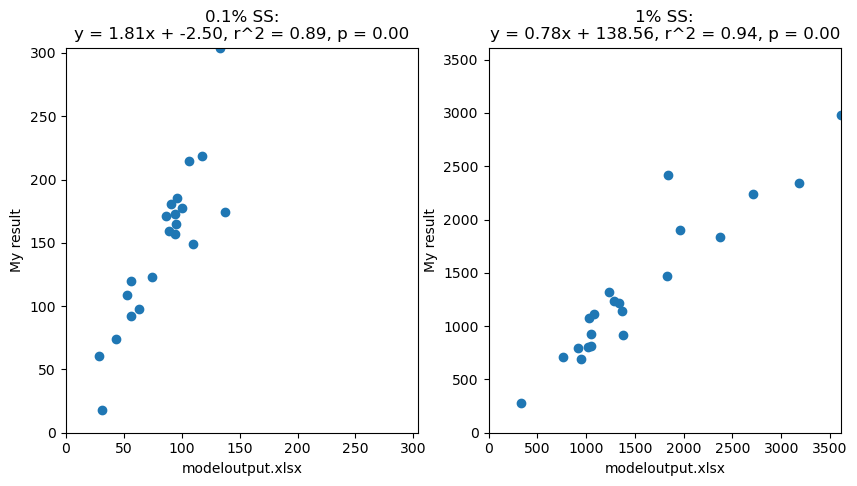

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(correct_0p1, ccn_0p1s)
axs[0].set_xlim(0, np.max([correct_0p1, ccn_0p1s]))
axs[0].set_ylim(0, np.max([correct_0p1, ccn_0p1s]))
axs[0].set_title(f'0.1% SS:\ny = {m01:.2f}x + {b01:.2f}, r^2 = {r01:.2f}, p = {p01:.2f}')
axs[1].scatter(correct_1, ccn_1s)
axs[1].set_xlim(0, np.max([correct_1, ccn_1s]))
axs[1].set_ylim(0, np.max([correct_1, ccn_1s]))
axs[1].set_title(f'1% SS:\ny = {m1:.2f}x + {b1:.2f}, r^2 = {r1:.2f}, p = {p1:.2f}')
[ax.set_xlabel('modeloutput.xlsx') for ax in axs]
[ax.set_ylabel('My result') for ax in axs]
fig.savefig('comparison.png')